# The ADALINE 

The Adaline algorithm (Adaptive Linear Algorithm) was proposed in 1959, shortly after Rosenblatt’s perceptron, by **Bernard Widrow** and **Ted Hoff** (one of the inventors of the microprocessor) at Stanford. Widrow and Hoff were electrical engineers, yet Widrow had attended the famous *Dartmouth Summer Research Project on Artificial Intelligence* in 1956, experience that got him interested in the idea of building brain-like artificial learning systems. When Widrow moved from MIT to Stanford, a colleague asked him whether he would be interested in taking Ted Hoff as his doctoral student. Widrow and Hoff came up with the Adaline algorithm on a Friday during their first session working together. At that time, implementing an algorithm in a mainframe computer was slow and expensive, so they decided to build a small device capable of being trained by the Adaline algorithm to learn to classify patterns of inputs.  

The main difference between the perceptron and Adaline, is that Adaline works by minimizin the **sum of squares of the linear errors** over a training set. This means that the learning rule is based on a **linear activation function** rather than a unit step function as in the perceptron. This is important as allows the minimization of a continuous cost function. Continuous cost functions have the advantage of being differentiable, which allows training neural nets by using the chain rule of calculus, which opened the door to train more complex algorithms like non-linear multilayer perceptrons, logistic regression, support vector machines, and others.

## Formal definition of ADALINE

As we mentioned before, Adaline uses a **linear activation function**, which is essencially the **identity function** of the net input to the network. This is defined as:

$$\hat{y} = \sum_{j=1}^n x_j w_j + \theta$$


where:  
- $\hat{y}$ is the output of the model (real value scalar)  
- $x$ is a real value input vector   
- $w$ is a real vaue weight vector
- $\theta$ is a bias term  

It is crucial to notice that even when we use a linear activation function to compute the output of the network, if we attempt to make a **binary classification decision**, we will still use a step-like decision function by taking the sign as: 

$$  sgn(\hat{y}) =
\begin{cases}
 +1,  & \text{if $\hat{y}$ > 0} \\
-1, & \text{otherwise}
\end{cases}
$$


## A note on the Perceptron and Adaline fundamental difference

At this point you may be wondering what's the difference between the Perceptron and Adaline considering that both end up using a step-function to make classifications. The difference is the **learning rule to update the weight** of the network. The perceptron update the weights by computing the difference between the expected and predicted **class labels**. In practice, this means that the perceptron is comparing three types of discrete values: -1, 0, and 1. On the other hand, Adaline computes the difference between the expected class label (i.e., -1 or 1) and the **continious real value** of the linear activation function. 


## Learning rule

As we mentioned before, the Adaline learning rule consist of comparing the expected class label to the predicted continous real value output. To achieve this, Adaline uses the **LMS (least mean square) algorithm**, also know as **Widrow-Hoff Delta Rule**, which minimize the sum of squares of the linear errors over the training set. In the machine learning literature, this is know as a **cost funtion** to be minimized. This is defined as:

$$L = \sum_{j=1}^n (\hat{y}_j-y_j)^2$$

where: 
- $\hat{y}$ is the output of the model (real value scalar)  
- $y$ is the expected class label (-1 or +1)

Now the question is how to minimize sum of squares erros (SSE). We do this by adjusting the values of $w$ vector. Since we are working with a continous value function, we can compute the change in the SSE with respect to changes in $w$ by applying the **gradient descent algorithm**. Therefore, we update the values of $w$ by:

$$w_{j+1} \leftarrow w_j + \eta(- \Delta_j)$$

where:
- $\eta$ is the learning rate (positive constant)
- $\Delta_j$ is the value of the gradient at a point in the SSE surface 

This algorithm works by taking steps of a size controled by the learning rate $\eta$, on the surface defined by the vector of weights. A common way to express this idea is in analogy to climbing: if you're in a mountain, you can ascent by **climbing up-hill** or descent by **climbing down-hill**. Since the surface defined by this quadratic function is convex (think in a bowl) and has a unique global minimun, **we want to go down-hill** (i.e., we do *gradient descent*) where the SSE is minimized.  

To obtain the gradient in a given point the convex-surface, we compute the partial derivative of the cost function $L$ with respect to each weight in the weight vector as:

$$\frac{\partial L} {\partial w_j} = -\sum_{i}(y_i - \hat{y_i})x_{ji}$$ 

Finally, by replacing terms, the update rule can be writen as:

$$\Delta w_j = -\eta \frac{\partial L} {\partial w_j} = \eta\sum_{i}(y_i - \hat{y_i})x_{ji}$$



## Adaline algorithm implementation

We will implement the Adaline algorithm from scrath with Python and Numpy (a Python package for scientific computing). The goal is to understand the perceptron step-by-step execution rather than achieving an elegant implementation. I'll break down each step into functions to ensemble everything at the end. 


### Generate vector of random weights

In [1]:
import numpy as np

def random_weights(X, random_state: int):
    '''create vector of random weights
    Parameters
    ----------
    X: 2-dimensional array, shape = [n_samples, n_features]
    Returns
    -------
    w: array, shape = [w_bias + n_features]'''
    rand = np.random.RandomState(random_state)
    w = rand.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    return w

Predictions from Adaline are obtained by a linear combination of features and weights. It is common practice to begin with a vector of small random weights that would be updated later by the Adaline learning rule.

### Compute net input

In [15]:
def net_input(X, w):
    '''Compute net input as dot product'''
    return np.dot(X, w[1:]) + w[0]

Here we pass the featue matrix and the previously generated vector of random weights to compute the inner product. Remember that we need to add an extra weight for the bias term at the begining of the vector (`w[0`)

### Compute activation

In [3]:
def activation(X):
    '''Compute linear activation'''
    return X

Note that the activation function returns the same values passed in. As we mentioned earlier, the linear activation function of Adaline, is the **identity function**, which means exactly this: units will be activated in direct proportion to the output of the linear combination of vectors and weights. Technically, we might not use this function and the result will be the same. Yet, we add this for conceptual completeness. 

### Compute predictions

In [4]:
def predict(X, w):
    '''Return class label after unit step'''
    return np.where(net_input(X, w) >= 0.0, 1, -1)

Remember that although Adaline learning rule works by comparing the output of a linear function against the class labels, when doing predictions, we still need to pass the output by a *sgn function* to get class labels as in the perceptron.

### Training loop - Learning rule

In [14]:
def fit(X, y, eta=0.001, n_iter=100):
    '''loop over exemplars and update weights'''
    costs = []
    w = random_weights(X, random_state=1)
    for i in range(n_iter):
        net_input_v = net_input(X, w)
        output = activation(net_input_v) # identity function
        errors = (y - output) # compute errors for the entire dataset
        w[1:] += eta * X.T @ errors # update weigths for the entire dataset (feature weights)
        w[0] += eta * errors.sum() # update weigths for the entire dataset (bias-term weights)
        cost = (errors**2).sum() / 2.0 
        costs.append(cost)
 
    return w, costs

Let's examine the fit method that implements the Adaline learning rule:

* Create a vector of random weights by using the `random_weights` function with dimensionality equal to the number of columns in the feature matrix
* Loop over the entire dataset `n_iter` times with `for i in range(n_iter)`
* Compute the inner product between the feature matrix $X$ and the weight vector $w$ by using the `net_input(X, w)` function
* Compute the difference between the predicted values and the target values for the entire dataset `(y - output)`
* Update the weights in proportion to the learning rate $\eta$ by `w[1:] += eta * X.T @ errors` and `w[0] += eta * errors.sum()`
* Compute the SSE `cost = (errors**2).sum() / 2.0 `
* Save the SSE for each iteration `costs.append(cost)`

## Testing the Adaline

We will test the Adaline implementation on the same test that in our previous perceptron: **classifying figures by their shape**. We'll create two type of figures: **tall-figures** and **wide-figures**. As the name suggest, the tall-figures are figures that are taller than wider, and the wider-figures are figures that are wider than taller. 

To accomplish this, we'll sample tall and wide figures at random from a normal distribution by using the following function:

In [6]:
# Define function to create figures type
def figure_type(mu1, sigma1, mu2, sigma2, n_samples, target, seed):
    '''creates [n_sampes, 2] array
    
    Parameters
    ----------
    mu1, sigma1: int, shape = [n_samples, 2]
        mean feature-1, standar-dev feature-1
    mu2, sigma2: int, shape = [n_samples, 2]
        mean feature-2, standar-dev feature-2
    n_samples: int, shape= [n_samples, 1]
        number of sample cases
    target: int, shape = [1]
        target value
    seed: int
        random seed for reproducibility
    
    Return
    ------
    X: ndim-array, shape = [n_samples, 2]
        matrix of feature vectors
    y: 1d-vector, shape = [n_samples, 1]
        target vector
    ------
    X'''
    rand = np.random.RandomState(seed)
    f1 = rand.normal(mu1, sigma1, n_samples)
    f2 = rand.normal(mu2, sigma2, n_samples)
    X = np.array([f1, f2])
    X = X.transpose()
    y = np.full((n_samples), target)
    return X, y

In [7]:
# create tall-figures matrix
T, y_t = figure_type(10, 2, 5, 1, 100, 1, 1)
nl = '\n'
print(f'Feature matrix shape: {T.shape} {nl}target vector shape: {y_t.shape}')
print(f'Feature matrix: {nl}{T[0:4, :]} {nl}target vector: {nl}{y_t[0:4]}')

Feature matrix shape: (100, 2) 
target vector shape: (100,)
Feature matrix: 
[[13.24869073  4.55287144]
 [ 8.77648717  6.2245077 ]
 [ 8.9436565   5.40349164]
 [ 7.85406276  5.59357852]] 
target vector: 
[1 1 1 1]


In [8]:
# create wide-figures matrix
W, y_w = figure_type(5, 1, 10, 2, 100, -1, 2)
nl = '\n'
print(f'Feature matrix shape: {W.shape} {nl}target vector shape: {y_w.shape}')
print(f'Feature matrix: {nl}{W[0:4, :]} {nl}target vector: {nl}{y_w[0:4]}')

Feature matrix shape: (100, 2) 
target vector shape: (100,)
Feature matrix: 
[[ 4.58324215 12.32304298]
 [ 4.94373317 10.7721561 ]
 [ 2.8638039   7.73373345]
 [ 6.64027081 10.86618511]] 
target vector: 
[-1 -1 -1 -1]


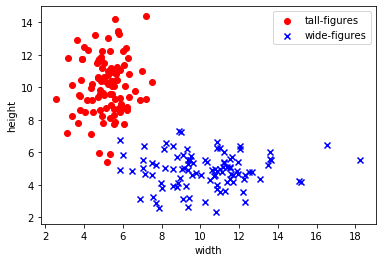

In [10]:
import matplotlib.pyplot as plt
plt.scatter(T[:, 1], T[:, 0], color='red', marker='o', label='tall-figures')
plt.scatter(W[:, 1], W[:, 0], color='blue', marker='x', label='wide-figures')
plt.xlabel('width')
plt.ylabel('height')
plt.legend(loc='upper right')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

X = np.concatenate((T, W), axis=0)
y = np.concatenate((y_t, y_w), axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=1,
                                                    shuffle=True)

In [12]:
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (140, 2)
y_train.shape: (140,)
X_test.shape: (60, 2)
y_test.shape: (60,)


This function takes the training set, training targets, learning rate, and number of iterations. Recall that the Adaline update the weights **after** doing a full pass for the entire training set, whereas the peceptron does it after each individual training exemplar. Therefore, we will pass the entire training set 1 time (`n_iter=1`)

In [53]:
# fit and predict values
def training_values(X_train, y_train, eta=0.001, n_iter=1):
    w, cost = fit(X_train, y_train, eta=eta, n_iter=n_iter)
    y_pred = predict(X_test, w)
    return w, cost, y_pred

w, cost, y_pred = training_values(X_train, y_train)

nl = '\n'
print(f'vector of weights: {w}{nl}')
print(f'cost at each time step: {cost}{nl}')
print(f'predicted value for each case: {y_pred}{nl}')

vector of weights: [ 0.02614765  0.42163998 -0.2764838 ]

cost at each time step: [70.66186787674164]

predicted value for each case: [ 1  1  1 -1 -1 -1  1  1  1 -1  1  1  1  1 -1 -1 -1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1  1  1  1 -1  1
 -1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1]



In [55]:
def acc(y_pred, y_test):
    num_correct_predictions = (y_pred == y_test).sum()
    accuracy = (num_correct_predictions / y_test.shape[0]) * 100
    return (accuracy)
    
accuracy = acc(y_pred, y_test)
print('Test set accuracy: %.2f%%' % accuracy)

Test set accuracy: 93.33%


We obtain a SSE (cost) equal to **70.7** with a **93.33%** of classification accuracy. Pretty good. Let's try now by passing training set **twice times** by the training loop.

In [63]:
# fit and predict values
w, cost, y_pred = training_values(X_train, y_train, n_iter=2)

nl = '\n'
print(f'vector of weights: {w}{nl}')
print(f'cost at each time step: {cost}{nl}')
print(f'predicted value for each case: {y_pred}{nl}')

vector of weights: [-0.12486643 -1.09800089 -1.08582971]

cost at each time step: [70.66186787674164, 158.3678895769619]

predicted value for each case: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]



In [61]:
accuracy = acc(y_pred, y_test)
print('Test set accuracy: %.2f%%' % accuracy)

Test set accuracy: 50.00%


Something really odd happened: the **SSE went up from 70 to 158.4**, and the **accuracy drop from 93.33% to 50%**. All the test cases has been classified as -1. Maybe we need more training, let's try with 5 loops.

In [65]:
# fit and predict values
w, cost, y_pred = training_values(X_train, y_train, n_iter=5)

nl = '\n'
print(f'vector of weights: {w}{nl}')
print(f'cost at each time step: {cost}{nl}')
print(f'predicted value for each case: {y_pred}{nl}')

accuracy = acc(y_pred, y_test)
print('Test set accuracy: %.2f%%' % accuracy)

vector of weights: [ 553.09756457 4250.98926834 4373.14848469]

cost at each time step: [70.66186787674164, 158.3678895769619, 20245.308891118297, 5041394.106643893, 1260698508.9443183]

predicted value for each case: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Test set accuracy: 50.00%


## The exploding gradient problem

Nothing improved, on the contrary, the SSE is getting bigger with each iteration over the training set. The key to this problem is on the **vector of weights**. Remember that the weights are updated in relation to the **mistmatch between the net ouput of the linear activation function and the class labels**. This means that unless the error is exactly zero, **the weights will continue to grow (or decrease) without limit** after each pass of the training set. As the weights grow,the net output will continue to grow as well, making the error on each iteration bigger. This loop continues **until the weights "explode"** and the network is unable to learn anything meaningful anymore. This is know as the "exploding" gradient problem, which is one of the main limitations on the use of this kind of training algorithms in the context of neural networks.

## The Linear Separability Constrain

In [11]:
#### TODO ####

## References

- Widrow, B., & Hoff, M. E. (1960). Adaptive switching circuits (No. TR-1553-1). Stanford Univ Ca Stanford Electronics Labs.

- Widrow, B., & Lehr, M. A. (1990). 30 years of adaptive neural networks: perceptron, madaline, and backpropagation. Proceedings of the IEEE, 78(9), 1415-1442.

- Widrow, B., & Lehr, M. A. (1995). Perceptrons, Adalines, and backpropagation. The handbook of brain theory and neural networks, 719-724.

**For code implementation:** 

- Raschka, S. (2015). Python machine learning. Packt Publishing Ltd.